In [51]:
from sklearn.datasets import load_svmlight_file 
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import Ipynb_importer
from closed_form_solution import close_form_solution

In [52]:
#读取数据并划分训练集合和验证集
X,y=load_svmlight_file("house_data")
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.33,random_state=42)
X_train=X_train.toarray()
X_val=X_val.toarray()

print("X_train shape",X_train.shape)
print("X_val shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)

X_train shape (339, 13)
X_val shape (167, 13)
y_train shape (339,)
y_val shape (167,)


In [53]:
#在原数据中插入一列1值
X_train_one=np.ones(X_train.shape[0])
X_val_one=np.ones(X_val.shape[0])
X_train=np.insert(X_train,0,values=X_train_one,axis=1)
X_val=np.insert(X_val,0,values=X_val_one,axis=1)
print(X_train.shape)
print(X_val.shape)

(339, 14)
(167, 14)


In [54]:
#初始化模型参数
W=np.zeros((X_train.shape[1],1))
#使用闭式解获得最优参数W_star
W_star=close_form_solution(X_train,y_train)
W_star=W_star.reshape((-1,1))
print(W.shape)
print(W_star.shape)

(14, 1)
(14, 1)


In [55]:
def predict(W,X):
    pre_y=np.dot(X,W)
    return pre_y

In [56]:
#选取loss函数，这里选用平方误差函数
def Loss(W,X,y):
    m=X.shape[0]
    y=y.reshape((m,1))
    loss=1/(2*m)*sum(np.power((np.dot(X,W)-y),2))

    return loss

In [57]:
#定义计算训练参数W和最优参数W_star的距离函数
def distance(W,W_star):
    distance=np.sqrt(sum(np.power(np.abs(W-W_star),2)))
    return distance

In [58]:
#测试distance函数
d=distance(W,W_star)
print(d)

[21.53588792]


In [59]:
#梯度下降
def gradientDescent(W,X_train,y_train,X_val,y_val,alpha,method,epoch=1000,random_seed=None,batch_size=None):
    """
    计算导数,并更新W,同时计算训练损失和验证损失
    """
    train_loss=np.zeros(epoch)
    val_loss=np.zeros(epoch)
    w_distance=np.zeros(epoch)
    m=X_train.shape[0]
    y_train=y_train.reshape((y_train.shape[0],1))
    y_val=y_val.reshape((y_val.shape[0],1))
    if method=="BGD": #批量梯度下降
        for i in range(epoch):
            train_loss[i]=Loss(W,X_train,y_train)
            val_loss[i]=Loss(W,X_val,y_val)
            w_distance[i]=distance(W,W_star)
            W=W-(alpha/m)*(X_train.T.dot(predict(W,X_train)-y_train))
        return W,train_loss,val_loss,w_distance
    elif method=="SGD":#随机梯度下降   
        np.random.seed(random_seed)
        rand_arr=np.arange(X_train.shape[0])
        for i in range(epoch):
            train_loss[i]=Loss(W,X_train,y_train)
            val_loss[i]=Loss(W,X_val,y_val)
            w_distance[i]=distance(W,W_star)
            np.random.shuffle(rand_arr)
            index=rand_arr[0:1]
            X_train_one=X_train[index]
            y_train_one=y_train[index]
            W=W-alpha*(predict(W,X_train_one)-y_train_one)*X_train_one.T

        return W,train_loss,val_loss,w_distance
    else: #method=="MBGD" 小批量随机梯度下降
        np.random.seed(random_seed)
        rand_arr=np.arange(X_train.shape[0])
        for i in range(epoch):
            train_loss[i]=Loss(W,X_train,y_train)
            val_loss[i]=Loss(W,X_val,y_val)
            w_distance[i]=distance(W,W_star)
            np.random.shuffle(rand_arr)
            batch_size=int(batch_size)
            index=rand_arr[0:batch_size]
            X_train_batch=X_train[index]
            y_train_batch=y_train[index]
            W=W-(alpha/m)*(X_train_batch.T.dot(predict(W,X_train_batch)-y_train_batch))
        return W,train_loss,val_loss,w_distance

In [60]:
#开始训练
#使用随机梯度下降
epoch=1000
alpha=0.01
new_W,train_loss,val_loss,w_distance=gradientDescent(W,X_train,y_train,X_val,y_val,alpha,method="SGD",epoch=epoch,random_seed=2019)


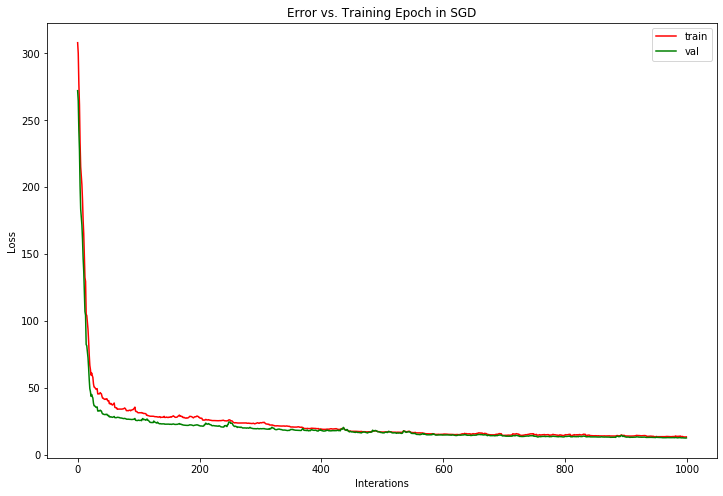

In [61]:
#画出学习曲线
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epoch), train_loss, 'r',label='train')
ax.plot(np.arange(epoch), val_loss, color='green', label='val')
plt.legend() 
ax.set_xlabel('Interations')
ax.set_ylabel('Loss')
ax.set_title('Error vs. Training Epoch in SGD')
plt.show()

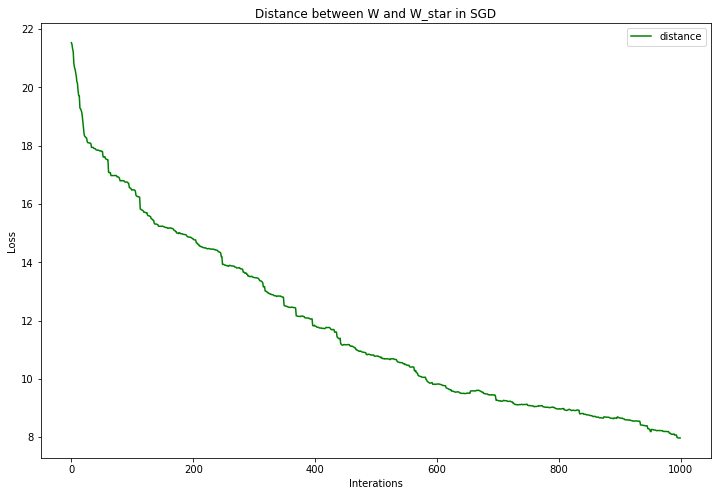

In [62]:
#画出训练参数W与最优参数W_star之间的距离随训练次数的变化
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epoch), w_distance, 'g',label='distance')

plt.legend() 
ax.set_xlabel('Interations')
ax.set_ylabel('Loss')
ax.set_title('Distance between W and W_star in SGD')
plt.show()

In [63]:
#使用批量梯度下降
epoch=1000
alpha=0.01
new_W,train_loss,val_loss,w_distance=gradientDescent(W,X_train,y_train,X_val,y_val,alpha,method="BGD",epoch=epoch,random_seed=2019)

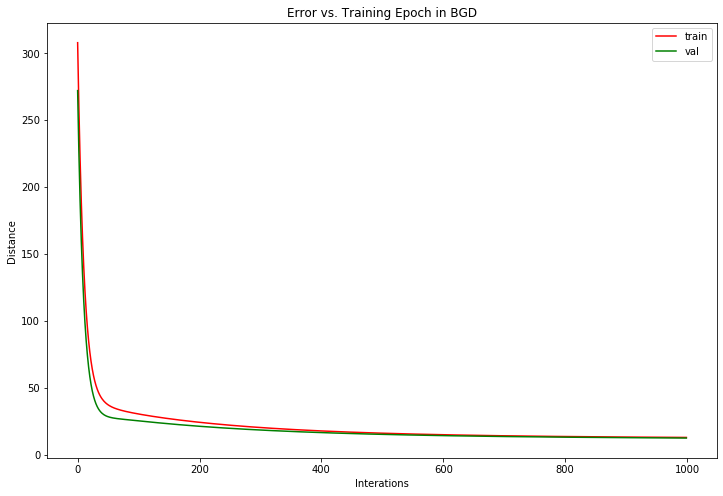

In [64]:
#画出学习曲线
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epoch), train_loss, 'r',label='train')
ax.plot(np.arange(epoch), val_loss, color='green', label='val')
plt.legend() 
ax.set_xlabel('Interations')
ax.set_ylabel('Distance')
ax.set_title('Error vs. Training Epoch in BGD')
plt.show()

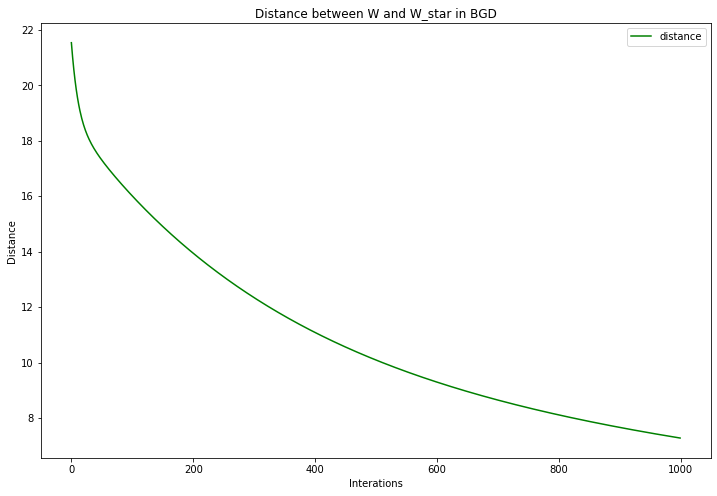

In [65]:
#画出训练参数W与最优参数W_star之间的距离随训练次数的变化
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epoch), w_distance, 'g',label='distance')

plt.legend() 
ax.set_xlabel('Interations')
ax.set_ylabel('Distance')
ax.set_title('Distance between W and W_star in BGD')
plt.show()

In [66]:
#使用随机批量梯度下降
epoch=1500
alpha=0.01
new_W,train_loss,val_loss,w_distance=gradientDescent(W,X_train,y_train,X_val,y_val,alpha,method="MBGD",epoch=epoch,random_seed=2019,batch_size=20)

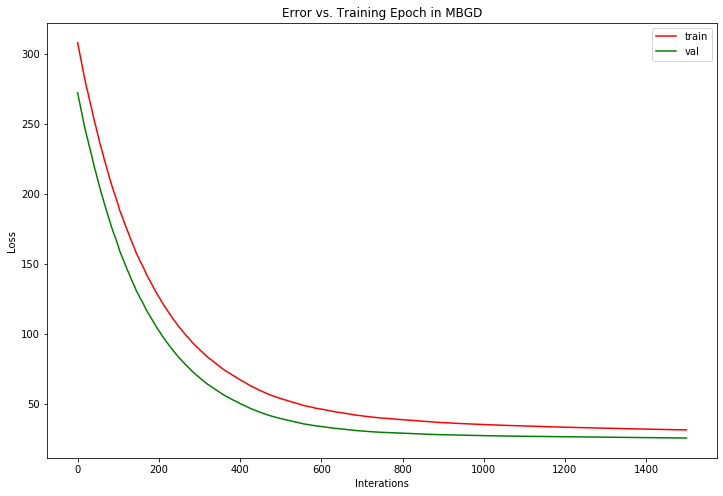

In [67]:
#画出学习曲线
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epoch), train_loss, 'r',label='train')
ax.plot(np.arange(epoch), val_loss, color='green', label='val')
plt.legend() 
ax.set_xlabel('Interations')
ax.set_ylabel('Loss')
ax.set_title('Error vs. Training Epoch in MBGD')
plt.show()

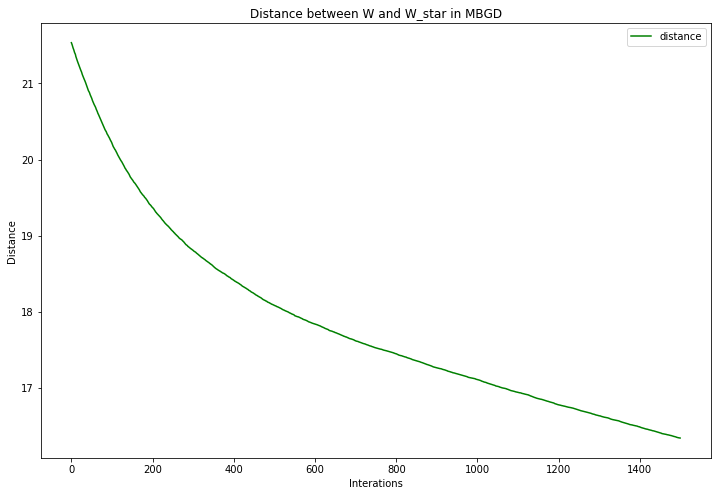

In [68]:
#画出训练参数W与最优参数W_star之间的距离随训练次数的变化
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epoch), w_distance, 'g',label='distance')

plt.legend() 
ax.set_xlabel('Interations')
ax.set_ylabel('Distance')
ax.set_title('Distance between W and W_star in MBGD')
plt.show()